In [1041]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import re
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

### Changes to dataset
Row 74. Gpa change from .2.84 to 2.84

Row 44, HSSC-1 from 40% to 425
Row 48, HSSC-1 to 368


In [1042]:
fav_color_feature_enum = [
    {"brown?|Brown?|BROWN?":"Brown"},
    {"black?|Black?|BLACK?|/sBlack?|Black/s?|black/s?":"Black"},
    {"orange?|Orange?|ORANGE?":"Orange"},
    {"green?|Green?|GREEN?|Light Green?":"Green"},
    {"yellow?|Yellow?|YELLOW":"Yellow"},
    {"blue?|Blue?|BLUE?|Dark\sBlue?|Navy Blue?":"Blue"},
    {"Red?":"Red"},
    {"Pink?":"Pink"},
    {"Peach?":"Peach"},
    {"Gray and Brown?|Grey?|Mustard":"Gray"},
    {"Purple?|\sPurple?|Purple\s?":"Purple"},
    {"white?|White?":"White"}

]


birth_month_feature_enum = [
    {"january?":"January"},
    {"february?":"February"},
    {"march?":"March"},
    {"april?":"April"},
    {"may?":"May"},
    {"june?":"June"},
    {"july?":"July"},
    {"august?":"August"},
    {"september?|sep?":"September"},
    {"october?":"October"},
    {"november?":"November"},
    {"december?":"December"}
]

## Classes 
### Preprocessor
Used for processing the file and placing them in the correct normalized format

In [1043]:
class preprocessor:
    def __init__(self,filename:str):
        self._filename:str = filename;
        self.dataset_raw:str = "";
        self.import_file()
        self.normalize()
        self.dataset_raw = self.dataset_raw.dropna() # Remove null rows

    #private
    def _match_exp(self,exp,col_name):
        for i in self.dataset_raw[col_name]:
            if(re.match(exp,i) is not None):
                print(i)

    def normalize_columns(self,input_val,enum_object):
        tag = "tagged"
        for i in enum_object:
            for key in i:
                if(input_val in key):
                    output = re.sub(key,i[key],input_val,flags=re.I)
                    return output
                else:
                    pass

    
    def normalize_columns_update(self,input_val,enum_object):
        tag = "tagged"
        for i in enum_object:
            for key in i:
                #if(input_val in key): <- The input must be present in the key for this to match
                if(re.match(key,input_val,flags=re.I) is not None):
                    output = re.sub(key,i[key],input_val,flags=re.I)
                    return output
                else:
                    pass

            
    #normalization

    def normalize(self):
        #find and replace skin color 
        arr = []
        for col in self.dataset_raw.columns:
            arr.append(col)
        #print("\nData labels are: " + str(arr))
        print("\nNormalizing data...")
        self.dataset_raw['FavoriteColor'] = self.dataset_raw['FavoriteColor'].str.strip()
        self.dataset_raw['FavoriteColor'] = self.dataset_raw['FavoriteColor'].map(lambda x:self.normalize_columns(x,fav_color_feature_enum))
        self.dataset_raw['BirthMonth'] = self.dataset_raw['BirthMonth'].str.strip()
        self.dataset_raw['BirthMonth'] = self.dataset_raw['BirthMonth'].map(lambda x:self.normalize_columns_update(x,birth_month_feature_enum))

    #public
    def import_file(self):
        print("\nImporting the input file...")

        cwd = os.getcwd() + '/Datasets/';
        self.dataset_raw = pd.read_csv(cwd + self._filename)
        self.dataset_raw.columns = [c.replace(' ', '_') for c in self.dataset_raw.columns]

    def display(self,rows=200):
        print(self.dataset_raw.head())

    def name_starting_with_letter(self,letter='H'):
        print("Name starting with H")
        exp = '^H'
        self._match_exp(exp,'Name')

    def num_of_words_in_names(self,num = 3):
        print("Names with three words")
        exp = '^[\w]+\s[\w]+\s[\w]+'
        self._match_exp(exp,'Name')

    def percentage_match_on_cgpa(self,gpa=3):
        total_rows = self.dataset_raw.shape[0]
        num = 0
        for i in self.dataset_raw['CGPA']:
            if(float(i)>=gpa):
                num = num + 1
        perc = (num/total_rows)*100
        print("Percentage of students with CGPA above {}: {:.2f}".format(gpa,perc))

    def gender_ratio_pie_chart(self):
        self.dataset_raw.groupby(['Gender']).size().plot(kind='pie',y=self.dataset_raw.shape[0]).set_ylabel("Gender Ratio")

    def plot_gpa_on_histogram(self):
        col = self.dataset_raw
        col = col[col.Gender != 'Female']
        col.hist(column='CGPA', by='Gender', bins=[2.0, 2.6, 3.1, 4.0], grid=False)

    def plot_hssc_marks(self):
        self.dataset_raw_ = self.dataset_raw.drop(self.dataset_raw.index[1:110])
        self.dataset_raw_.plot(x='HSSC-1', y='Gender',kind='scatter',c='cornflowerblue',)
    
    def fav_color_bar(self):
        self.dataset_raw.groupby(['Gender'])['FavoriteColor'].value_counts().unstack().plot(kind='bar',stacked = True)

    def birth_month_line_chart(self):
        a = self.dataset_raw['BirthMonth'].value_counts()
        month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        a = a.reindex(month_order,axis=0)
        a.plot(kind='line',title="Birthday distribution")

    def corr_matrix(self):
        
        a= self.dataset_raw['HSSC-1'].astype(int).corr(self.dataset_raw['HSSC-2'].astype(int))
        data = self.dataset_raw[['HSSC-1','HSSC-2']]
        corr_matrix = data.corr()
        print(corr_matrix)
        sns.heatmap(corr_matrix,annot=True)

In [1044]:
prep = preprocessor('hello.csv')
prep.name_starting_with_letter()



Importing the input file...

Normalizing data...
Name starting with H
Hamza Naveed
Habib Ullah
Hunain Javed
Hafiz Malahim Labib.
HAMNA TARIQ SALEEMI
Hina
Hamza Javed Khan
Hamayoun Masroor
Hussain afzal


In [1045]:

prep.num_of_words_in_names()


Names with three words
Syeda Maham Gillani
Shahzada Mujahid Raza
Muhammad Subhan Khan 
SARMAD WAHEED AHMED 
M Hassaan Lateef 
Ahmed Amjad Dar 
Muhammad Ibrahim Khalil
Muhammad saim jamil
Ahmar Hafeez Khan
Muhammad Umar Asghar
MUHAMMAD HAIDER AWAN
Muhammad Ammar Khalid
Muhammad Hashir Azeem
Muhammad Aun Raza
Syeda Noor Zehra Naqvi
Hafiz Malahim Labib.
HAMNA TARIQ SALEEMI
Bashara Tehseen Liaqat
Muhammad zafar ijaz khan
Muhammad Hammad Ejaz
MUHAMMAD SAIF ULLAH
Syed Muhammad Hamza Imran
Muhammad Al Fahad
Syed Ali Raza Shah Bukhari
Abdul Hadi Khan
Hamza Javed Khan
Salman Wasi Ahmad Khan 
GHULAM MUSTAFA SHIEKH
Muhammad Azeem Shoukat 
Muhammad Nouman Tahir
Muhammad Huzaifa Jawad
NOOR TARIQ RANA
Muhammad Asadullah Rind
Muhammad Talha Saeed
Muhammad Bilal Aslam
Syed Ali Mehdi
Aftab Ahmad Khan
Syed Zain Raza
Mutyyab Ul Hassan Khan
Muhammad Umair Tariq 


In [1046]:

prep.percentage_match_on_cgpa()


Percentage of students with CGPA above 3: 30.40


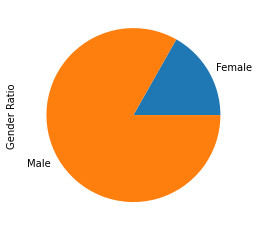

In [1047]:

prep.gender_ratio_pie_chart()


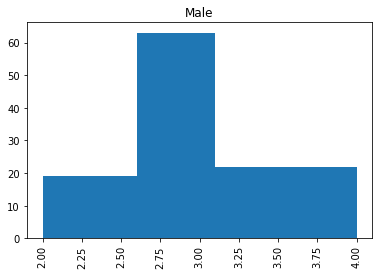

In [1048]:

prep.plot_gpa_on_histogram()


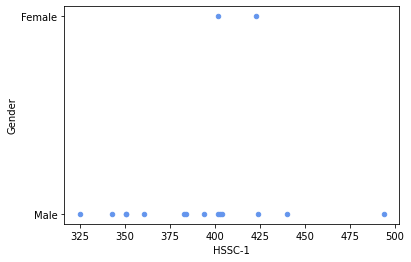

In [1049]:

prep.plot_hssc_marks()


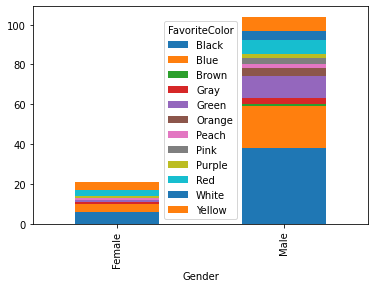

In [1050]:

prep.fav_color_bar()


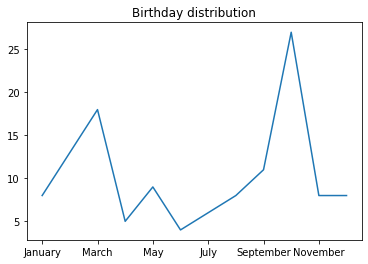

In [1051]:
prep.birth_month_line_chart()


          HSSC-1    HSSC-2
HSSC-1  1.000000  0.137888
HSSC-2  0.137888  1.000000


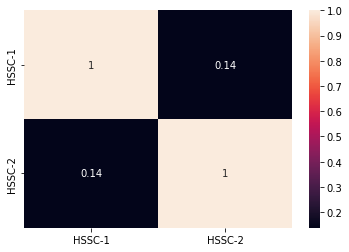

In [1052]:
prep.corr_matrix()